In [1]:
import networkx as nx
from RobotGraph import RobotGraph
import gym
from pathlib import Path

In [2]:
env = gym.make('FetchReachEnv-v0')
home = str(Path.home())
rg = RobotGraph(env.sim,
               home + '/Documents/SAC_GCN/CustomGymEnvs/envs/fetchreach/CustomFetchReach/assets/fetch/')

nodelist = [env.sim.model.body_name2id(n.attrib['name']) for n in rg.node_list]
edgelist = [(env.sim.model.body_name2id(rg.node_list[f].attrib['name']), env.sim.model.body_name2id(rg.node_list[t].attrib['name'])) for f, t in zip(rg.edges_from, rg.edges_to)]

In [3]:
g = nx.Graph()
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)

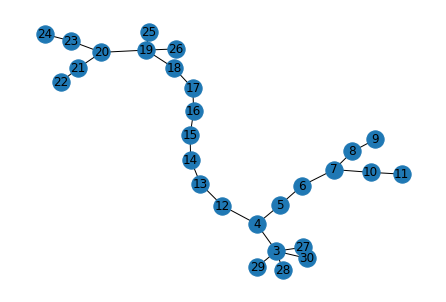

In [9]:
nx.draw(g, with_labels=True)

In [5]:
print(nodelist)

[26, 8, 12, 20, 21, 4, 6, 22, 9, 14, 18, 23, 29, 16, 24, 25, 10, 27, 3, 5, 13, 19, 30, 11, 17, 7, 15, 28]


In [6]:
print(edgelist)

[(4, 3), (5, 4), (6, 5), (12, 4), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (25, 19), (26, 19), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 7), (11, 10), (12, 4), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18), (20, 19), (21, 20), (22, 21), (23, 20), (24, 23), (25, 19), (26, 19), (27, 3), (28, 3), (29, 3), (30, 3)]
